In [3]:
import torch
import matplotlib.pyplot as plt

In [5]:
words = open("names.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [7]:
len(words)

32033

In [9]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [171]:
block_size = 3
X, Y = [], []
for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [173]:
def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:

        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)

            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)

    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [125]:
C = torch.randn((27, 2))

In [15]:
C[5]

tensor([1.3431, 0.0618])

In [21]:
torch.nn.functional.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([1.3431, 0.0618])

In [37]:
emb = C[X]
emb.shape
X.shape

torch.Size([32, 3])

In [25]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [ ]:
# squash [32, 3, 2] tensor to [32, 6]
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [39]:
# This does the same as above
torch.cat(torch.unbind(emb, 1), 1)

tensor([[ 0.3911, -0.5269,  0.3911, -0.5269,  0.3911, -0.5269],
        [ 0.3911, -0.5269,  0.3911, -0.5269,  1.3431,  0.0618],
        [ 0.3911, -0.5269,  1.3431,  0.0618,  0.2352,  0.5076],
        [ 1.3431,  0.0618,  0.2352,  0.5076,  0.2352,  0.5076],
        [ 0.2352,  0.5076,  0.2352,  0.5076,  0.2686,  1.0324],
        [ 0.3911, -0.5269,  0.3911, -0.5269,  0.3911, -0.5269],
        [ 0.3911, -0.5269,  0.3911, -0.5269,  0.5382,  0.4153],
        [ 0.3911, -0.5269,  0.5382,  0.4153, -1.0401, -1.1278],
        [ 0.5382,  0.4153, -1.0401, -1.1278,  0.9043, -1.4069],
        [-1.0401, -1.1278,  0.9043, -1.4069, -0.6111, -1.0082],
        [ 0.9043, -1.4069, -0.6111, -1.0082,  0.9043, -1.4069],
        [-0.6111, -1.0082,  0.9043, -1.4069,  0.2686,  1.0324],
        [ 0.3911, -0.5269,  0.3911, -0.5269,  0.3911, -0.5269],
        [ 0.3911, -0.5269,  0.3911, -0.5269,  0.2686,  1.0324],
        [ 0.3911, -0.5269,  0.2686,  1.0324, -0.6111, -1.0082],
        [ 0.2686,  1.0324, -0.6111, -1.0

In [41]:
# MUCH more efficient way of doing this resize
emb.view(32, 6)

tensor([[ 0.3911, -0.5269,  0.3911, -0.5269,  0.3911, -0.5269],
        [ 0.3911, -0.5269,  0.3911, -0.5269,  1.3431,  0.0618],
        [ 0.3911, -0.5269,  1.3431,  0.0618,  0.2352,  0.5076],
        [ 1.3431,  0.0618,  0.2352,  0.5076,  0.2352,  0.5076],
        [ 0.2352,  0.5076,  0.2352,  0.5076,  0.2686,  1.0324],
        [ 0.3911, -0.5269,  0.3911, -0.5269,  0.3911, -0.5269],
        [ 0.3911, -0.5269,  0.3911, -0.5269,  0.5382,  0.4153],
        [ 0.3911, -0.5269,  0.5382,  0.4153, -1.0401, -1.1278],
        [ 0.5382,  0.4153, -1.0401, -1.1278,  0.9043, -1.4069],
        [-1.0401, -1.1278,  0.9043, -1.4069, -0.6111, -1.0082],
        [ 0.9043, -1.4069, -0.6111, -1.0082,  0.9043, -1.4069],
        [-0.6111, -1.0082,  0.9043, -1.4069,  0.2686,  1.0324],
        [ 0.3911, -0.5269,  0.3911, -0.5269,  0.3911, -0.5269],
        [ 0.3911, -0.5269,  0.3911, -0.5269,  0.2686,  1.0324],
        [ 0.3911, -0.5269,  0.2686,  1.0324, -0.6111, -1.0082],
        [ 0.2686,  1.0324, -0.6111, -1.0

In [46]:
# '-1' allows pytorch to infer size 
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [48]:
h

tensor([[-0.8114, -0.9981, -0.8647,  ..., -0.2641,  0.9951,  0.2852],
        [-0.5916, -0.9999, -0.9481,  ..., -0.9131,  0.9954,  0.0137],
        [ 0.6603, -0.9985, -0.6969,  ..., -0.8540,  0.7046, -0.6292],
        ...,
        [ 0.0867,  0.3235,  0.5128,  ...,  0.3911, -0.9998, -0.9779],
        [-0.9854, -0.5098, -0.9824,  ...,  0.8180,  0.9985, -0.1057],
        [ 0.9937, -0.9868,  0.9959,  ...,  0.9924, -0.9999, -0.9525]])

In [49]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [51]:
logits = h @ W2 + b2

In [53]:
logits.shape

torch.Size([32, 27])

In [56]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)

In [58]:
prob.shape

torch.Size([32, 27])

In [61]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(16.3208)

In [62]:
# Organized

In [174]:
# dataset
Xtr.shape, Ytr.shape

(torch.Size([182580, 3]), torch.Size([182580]))

In [215]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g, requires_grad=True)
W1 = torch.randn((30, 200), generator=g, requires_grad=True)
b1 = torch.randn(200, generator=g, requires_grad=True)
W2 = torch.randn((200, 27), generator=g, requires_grad=True)
b2 = torch.randn(27, generator=g, requires_grad=True)
parameters = [C, W1, b1, W2, b2]

In [216]:
sum(p.nelement() for p in parameters) # total num parameters

11897

In [152]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [217]:
lri = []
lossi = []
stepi = []

In [229]:
for i in range(50000):

    ix = torch.randint(0, Xtr.shape[0], (32,))

    # forward pass
    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = torch.nn.functional.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in parameters:
        p.grad = None

    loss.backward()

    # update
    lr = 0.01 #lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

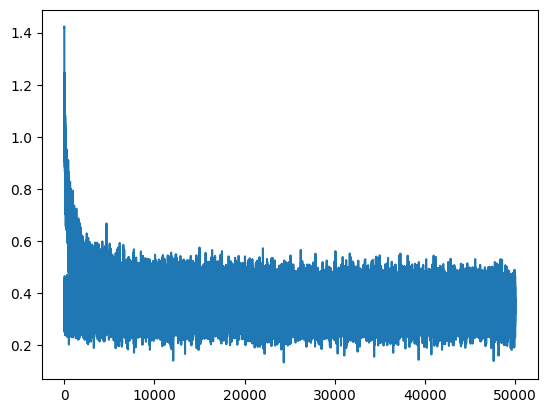

In [224]:
plt.plot(stepi, lossi)

In [230]:
print(loss.item())

1.8380627632141113


In [231]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1)
logits = h @ W2 + b2
loss = torch.nn.functional.cross_entropy(logits, Ydev)
loss

tensor(2.2107, grad_fn=<NllLossBackward0>)

In [209]:
# training split, dev/ validation split, test, split
# 80%, 10%, 10%

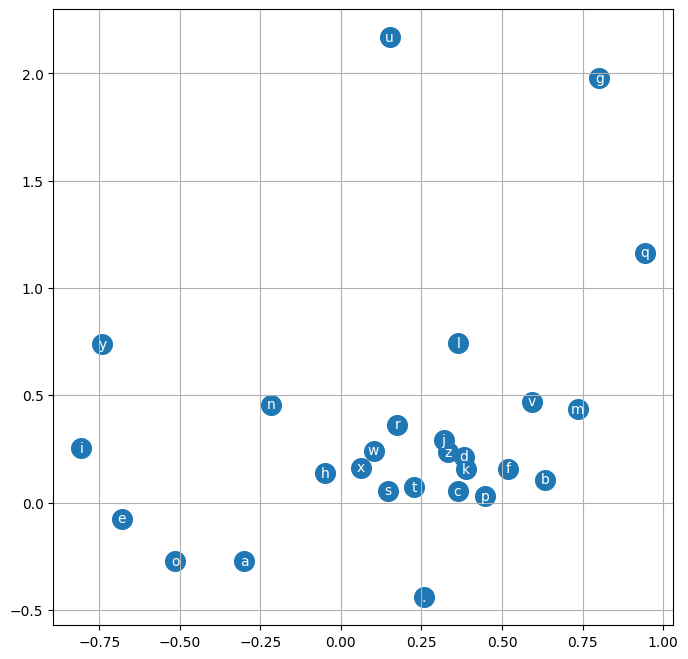

In [212]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [237]:
# Sample from model
for i in range(20):

    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = torch.nn.functional.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

shyra.
jaulmaniane.
jewlingyn.
jorelessepreel.
fari.
lobennarlynn.
kartaely.
ash.
arahi.
ajasha.
mara.
sayca.
kasley.
ailyn.
ragetton.
kala.
noham.
saison.
jazse.
din.
